## ST2195 Programming for Data Science Coursework 

Source: 2009 ASA Statistical Computing and Graphics Data Expo

A subset of 2005 and 2006 data would be used to answer the follow questions:

- 1. When is the best time of day, day of the week, and time of year to fly to minimise delays?
- 2. Do older planes suffer more delays?
- 3. How does the number of people flying between different locations change over time?
- 4. Can you detect cascading failures as delays in one airport create delays in another?
- 5. Use the available variables to construct a model that predicts delays.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling

In [2]:
airport = pd.read_csv('airports.csv')
carrier = pd.read_csv('carriers.csv')
planes = pd.read_csv('plane-data.csv')
df_2005 = pd.read_csv('2005.csv')
df_2006 = pd.read_csv('2006.csv')

# Combining 2005 and 2006 data
df= pd.concat([df_2005,df_2006],ignore_index=True)

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14282518 entries, 0 to 14282517
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [5]:
df.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                255664
CRSDepTime                  0
ArrTime                285878
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime      285878
CRSElapsedTime              4
AirTime                285878
ArrDelay               285878
DepDelay               255664
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14026853
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [6]:
#Dataframe summary
pd.DataFrame({'unique':df.nunique(),
              'missing': df.isna().sum(),
              'dtypes':df.dtypes})

,unique,missing,dtypes
Year,2,0,int64
Month,12,0,int64
DayofMonth,31,0,int64
DayOfWeek,7,0,int64
DepTime,1601,255664,float64
CRSDepTime,1223,0,int64
ArrTime,1679,285878,float64
CRSArrTime,1406,0,int64
UniqueCarrier,22,0,object
FlightNum,7555,0,int64


In [7]:
# Impute NA values using interpolation
df['DepTime'] = df['DepTime'].interpolate(method='linear', axis=0, limit_direction='both')
df['ArrTime'] = df['ArrTime'].interpolate(method='linear', axis=0, limit_direction='both')
df['ActualElapsedTime'] = df['ActualElapsedTime'].interpolate(method='linear', axis=0, limit_direction='both')
df['CRSElapsedTime'] = df['CRSElapsedTime'].interpolate(method='linear', axis=0, limit_direction='both')
df['AirTime'] = df['AirTime'].interpolate(method='linear', axis=0, limit_direction='both')
df['ArrDelay'] = df['ArrDelay'].interpolate(method='linear', axis=0, limit_direction='both')
df['DepDelay'] = df['DepDelay'].interpolate(method='linear', axis=0, limit_direction='both')

In [8]:
# Renaming 'Month' into their abbreviated name via calendar module
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [9]:
# df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: calendar.day_name[x])  # Unable to resolve error

In [10]:
# Renaming 'DayOfWeek' to their abbreviated name manually 
df.loc[df['DayOfWeek'] == 1, ['DayOfWeek']] = 'Mon'
df.loc[df['DayOfWeek'] == 2, ['DayOfWeek']] = 'Tue'
df.loc[df['DayOfWeek'] == 3, ['DayOfWeek']] = 'Wed'
df.loc[df['DayOfWeek'] == 4, ['DayOfWeek']] = 'Thu'
df.loc[df['DayOfWeek'] == 5, ['DayOfWeek']] = 'Fri'
df.loc[df['DayOfWeek'] == 6, ['DayOfWeek']] = 'Sat'
df.loc[df['DayOfWeek'] == 7, ['DayOfWeek']] = 'Sun'

In [11]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,Jan,28,Fri,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,Jan,29,Sat,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,Jan,30,Sun,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,Jan,31,Mon,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,Jan,2,Sun,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


### Q1. When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [12]:
pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",30)
df1 = df[['Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','DepDelay','ArrDelay']]
df1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,DepDelay,ArrDelay
0,2005,Jan,28,Fri,1603.0,1605,1741.0,1759,-2.0,-18.0
1,2005,Jan,29,Sat,1559.0,1605,1736.0,1759,-6.0,-23.0
2,2005,Jan,30,Sun,1603.0,1610,1741.0,1805,-7.0,-24.0
3,2005,Jan,31,Mon,1556.0,1605,1726.0,1759,-9.0,-33.0
4,2005,Jan,2,Sun,1934.0,1900,2235.0,2232,34.0,3.0


In [13]:
# Define a function to convert intergers/float into time format
def Timeformat(i):
    try:
        if i != 0 or i != np.NAN:
            if str(int(i))[:-2].zfill(2) == '24':
                hh = '00'
            else:
                hh = str(int(i))[:-2].zfill(2)
            
            mm = str(int(i))[-2:].zfill(2)
            time = f"{hh}:{mm}"
        return time
    except Exception as e:
        pass

In [14]:
# Converting CRSDepTime, CRSArrTime into time format
df1['CRSDepTime'] = df1['CRSDepTime'].apply(Timeformat)
df1['CRSArrTime'] = df1['CRSArrTime'].apply(Timeformat)
df1[['CRSDepTime', 'CRSArrTime']].head()

C:\Users\wokie\AppData\Local\Temp/ipykernel_2952/1410788357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CRSDepTime'] = df1['CRSDepTime'].apply(Timeformat)
C:\Users\wokie\AppData\Local\Temp/ipykernel_2952/1410788357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CRSArrTime'] = df1['CRSArrTime'].apply(Timeformat)


,CRSDepTime,CRSArrTime
0,16:05,17:59
1,16:05,17:59
2,16:10,18:05
3,16:05,17:59
4,19:00,22:32


In [15]:
# Converting Scheduled Departure time into hours format
df1['CRSDepHour'] = df1['CRSDepTime'].apply(lambda x: x[:2])
df1['CRSArrHour'] = df1['CRSArrTime'].apply(lambda x: x[:2])

C:\Users\wokie\AppData\Local\Temp/ipykernel_2952/806573162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CRSDepHour'] = df1['CRSDepTime'].apply(lambda x: x[:2])
C:\Users\wokie\AppData\Local\Temp/ipykernel_2952/806573162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CRSArrHour'] = df1['CRSArrTime'].apply(lambda x: x[:2])


In [16]:
df1[['CRSDepTime', 'CRSArrTime', 'CRSDepHour']].head(10)

,CRSDepTime,CRSArrTime,CRSDepHour
0,16:05,17:59,16
1,16:05,17:59,16
2,16:10,18:05,16
3,16:05,17:59,16
4,19:00,22:32,19
5,19:00,22:32,19
6,19:00,22:32,19
7,19:00,22:32,19
8,19:00,22:23,19
9,19:00,22:23,19


#### Q1a. Best time of the day to fly to minimise delays

Text(0.5, 1.0, 'Distribution of Departure & Arrival Delay vs Scheduled Departure Time')

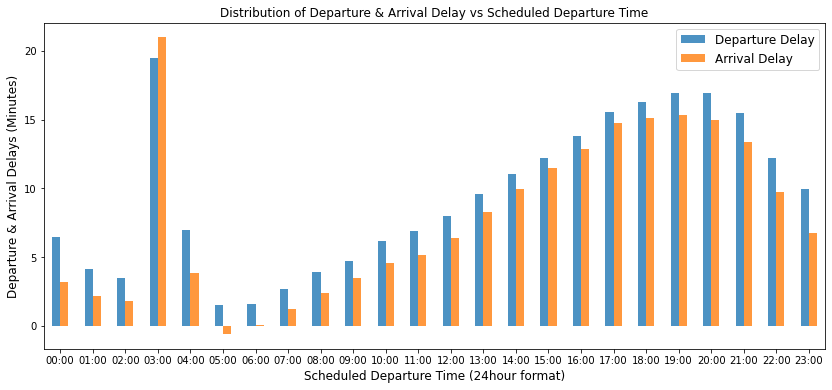

In [17]:
# Distribution of DepDelay & ArrDelay vs Scheduled Departure Time
ax = df1.groupby('CRSDepHour')[['DepDelay','ArrDelay']].mean().plot.bar(rot=0, alpha=0.8, figsize=[14,6])
ax.set_ylabel("Departure & Arrival Delays (Minutes)",fontsize=12)
ax.set_xlabel("Scheduled Departure Time (24hour format)",fontsize=12)
ax.set_xticklabels(['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00',
                    '12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'])
ax.legend(['Departure Delay','Arrival Delay'], fontsize = 12)
ax.set_title("Distribution of Departure & Arrival Delay vs Scheduled Departure Time")

- Best time of the day to fly is from 05:00am to 06:00am 

#### Q1b. Best day of the week to fly to minimize delays

Text(0.5, 1.0, 'Distribution of Departure & Arrival Delay vs Day of Week')

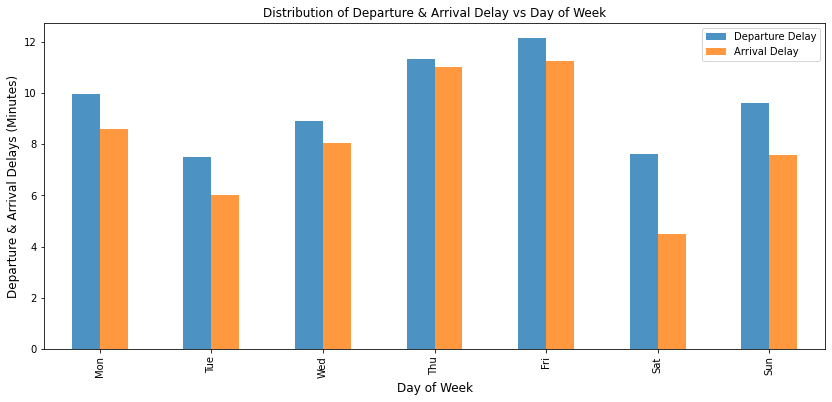

In [18]:
daysofweek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = df1.groupby('DayOfWeek')[['DepDelay','ArrDelay']].mean().reindex(daysofweek).plot(kind='bar',alpha=0.8, figsize=[14,6])
ax.set_ylabel("Departure & Arrival Delays (Minutes)",fontsize=12)
ax.set_xlabel("Day of Week",fontsize=12)
ax.legend(['Departure Delay','Arrival Delay'], fontsize=10 )
ax.set_title("Distribution of Departure & Arrival Delay vs Day of Week")

- Best day of the week to fly is on a Saturday

#### Q1c. Best time of the year to fly to minimize delays

Text(0.5, 1.0, 'Distribution of Departure & Arrival Delay vs Month')

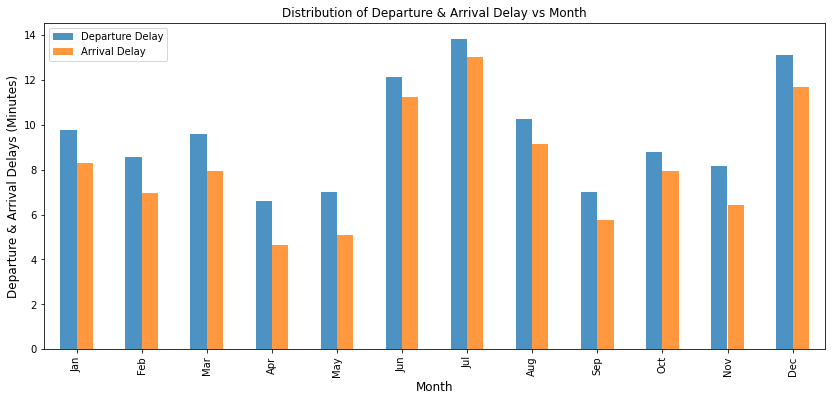

In [19]:
daysofmonth = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax = df1.groupby('Month')[['DepDelay','ArrDelay']].mean().reindex(daysofmonth).plot(kind='bar',alpha=0.8, figsize=[14,6])
ax.set_ylabel("Departure & Arrival Delays (Minutes)",fontsize=12)
ax.set_xlabel("Month",fontsize=12)
ax.legend(['Departure Delay','Arrival Delay'], fontsize = 10)
ax.set_title("Distribution of Departure & Arrival Delay vs Month")

- Best time of the year to fly is in April

 ### Q2 - Do older planes suffer more delays?

In [20]:
planes.head(40)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998


In [21]:
# Check for NA Values
planes.isnull().sum()

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year             549
dtype: int64

In [22]:
# Remove NA Values
df_planes = planes.dropna(axis=0)
df_planes.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998


In [23]:
# Merging of df with df_planes dataset
df_planes = planes.rename(columns = {'year': 'YearOfManufacture','tailnum': 'TailNum'})
df2_planes = df.merge(df_planes[['TailNum','YearOfManufacture']],how='left',left_on='TailNum',right_on='TailNum')  
df2_planes.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,YearOfManufacture
0,2005,Jan,28,Fri,1603.0,1605,1741.0,1759,UA,541,N935UA,158.0,174.0,131.0,-18.0,-2.0,BOS,ORD,867,4,23,0,NaN,0,0,0,0,0,0,1992
1,2005,Jan,29,Sat,1559.0,1605,1736.0,1759,UA,541,N941UA,157.0,174.0,136.0,-23.0,-6.0,BOS,ORD,867,6,15,0,NaN,0,0,0,0,0,0,1992
2,2005,Jan,30,Sun,1603.0,1610,1741.0,1805,UA,541,N342UA,158.0,175.0,131.0,-24.0,-7.0,BOS,ORD,867,9,18,0,NaN,0,0,0,0,0,0,1988
3,2005,Jan,31,Mon,1556.0,1605,1726.0,1759,UA,541,N326UA,150.0,174.0,129.0,-33.0,-9.0,BOS,ORD,867,11,10,0,NaN,0,0,0,0,0,0,1988
4,2005,Jan,2,Sun,1934.0,1900,2235.0,2232,UA,542,N902UA,121.0,152.0,106.0,3.0,34.0,ORD,BOS,867,5,10,0,NaN,0,0,0,0,0,0,1990


In [24]:
# Sum of Depature Delay and Arrival Delay respectively
df2planes_sum = df2_planes.groupby('YearOfManufacture')[['DepDelay','ArrDelay']].sum()

In [25]:
df2planes_sum.head()
df2planes_sum = df2planes_sum.reset_index()

In [26]:
g = sns.catplot(x="YearOfManufacture", y="ArrDelay", kind="bar", data=df2planes_sum, height=60, aspect=8.27, margin_titles=True)
g.fig.suptitle('Distribution of Arrival Delays vs Year of Manufacture')

Text(0.5, 0.98, 'Distribution of Arrival Delays vs Year of Manufacture')

In [27]:
sns.catplot(x="YearOfManufacture", y="DepDelay", kind="bar", data=df2planes_sum, height=60, aspect=8.27)
g.fig.suptitle('Distribution of Departure Delays vs Year of Manufacture')

Text(0.5, 0.98, 'Distribution of Departure Delays vs Year of Manufacture')

- Both charts above seems to indicate that newer models suffers more delays as compared to older models. Majority of the delays happens in the newer planes.
- Hence, we can conclude that older planes do not suffer more delays.

### Q3 - How does the number of people flying between different locations change over time?

In [28]:
# Subset datetime variables, Origin and Destination locations
df3 = df[['Year','Month','DayofMonth','DayOfWeek','Origin','Dest']]
df3.head()

,Year,Month,DayofMonth,DayOfWeek,Origin,Dest
0,2005,Jan,28,Fri,BOS,ORD
1,2005,Jan,29,Sat,BOS,ORD
2,2005,Jan,30,Sun,BOS,ORD
3,2005,Jan,31,Mon,BOS,ORD
4,2005,Jan,2,Sun,ORD,BOS


In [29]:
airport.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [30]:
# Finding the count of people travelling from the city of Boston(BOS) to Chicago(ORD)
df3_location =df3[(df3['Origin'] == 'BOS') &
              (df3['Dest'] == 'ORD')]
df3_location.count()

Year          14636
Month         14636
DayofMonth    14636
DayOfWeek     14636
Origin        14636
Dest          14636
dtype: int64

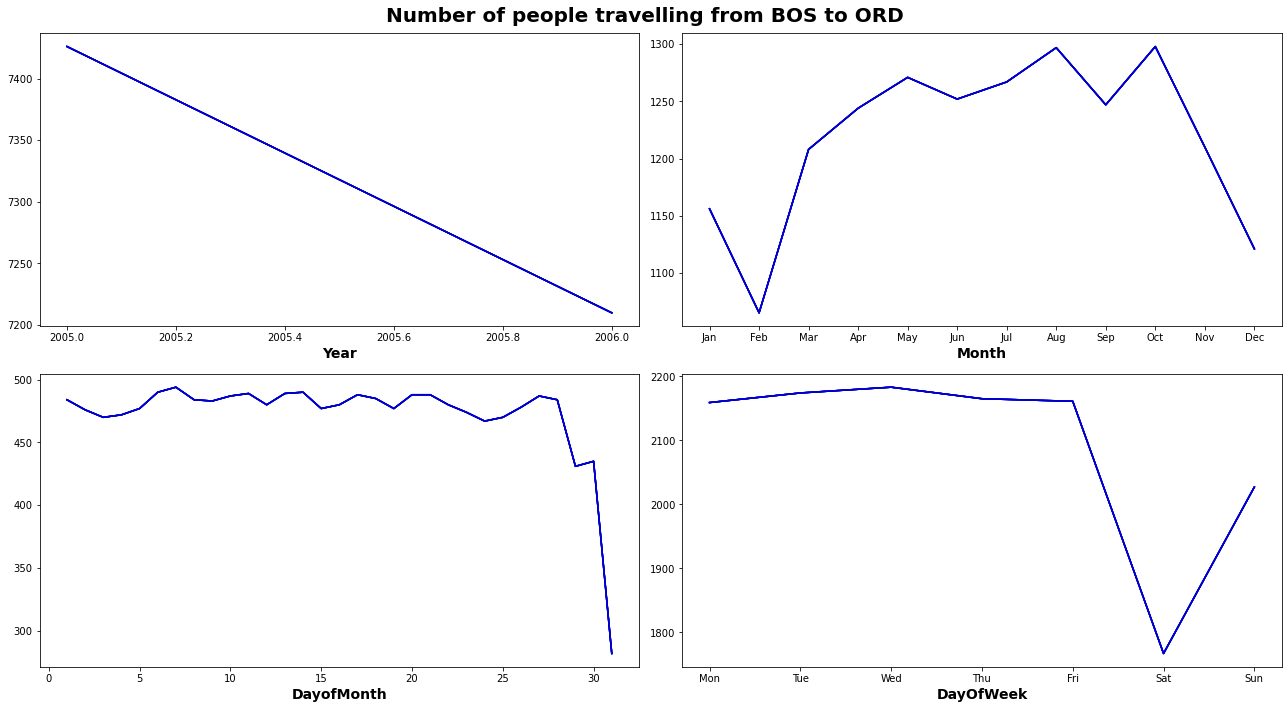

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs[0, 0].plot(df3_location.groupby(['Year']).count(), color='mediumblue')
axs[0, 0].set_xlabel('Year', fontsize=14, weight = "bold")
axs[0, 1].plot(df3_location.groupby(['Month']).count().reindex(daysofmonth), color='mediumblue')
axs[0, 1].set_xlabel('Month', fontsize=14, weight = "bold")
axs[1, 0].plot(df3_location.groupby(['DayofMonth']).count(), color='mediumblue')
axs[1, 0].set_xlabel('DayofMonth', fontsize=14, weight = "bold")
axs[1, 1].plot(df3_location.groupby(['DayOfWeek']).count().reindex(daysofweek), color='mediumblue')
axs[1, 1].set_xlabel('DayOfWeek', fontsize=14, weight = "bold")
plt.suptitle('Number of people travelling from BOS to ORD', fontsize=20, weight = "bold")
plt.tight_layout()
plt.show()

- The number of people travelling from BOS to ORD decreased from 2005 to 2006. 
- The number of people traveeling from BOS to ORD is at its lowest in the month of February while at its peak in October
- The number of people travelling from BOS to ORD is rather consistent from up till the 25th of the month whereby there is a sharp decrease.
- The number of people travelling from BOS to ORD is higher during the weekdays compared to the weekend. Saturday have the least number of people doing so.

### Q4 - Can you detect cascading failures as delays in one airport create delays in others?

In [32]:
# Make a copy of dataset for Q4
df4 = df.copy(deep=True) 

In [33]:
from time import strptime
df4['Month'] = df4['Month'].apply(lambda x: strptime(x,'%b').tm_mon)

In [34]:
# Adding a date column to the dataset
df4['Date'] = pd.to_datetime(dict(year=df4.Year, month=df4.Month, day=df4.DayofMonth))
first_col = df4.pop('Date')
df4.insert(0,'Date', first_col)

In [35]:
df4.head()

,Date,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005-01-28,2005,1,28,Fri,1603.0,1605,1741.0,1759,UA,541,N935UA,158.0,174.0,131.0,-18.0,-2.0,BOS,ORD,867,4,23,0,NaN,0,0,0,0,0,0
1,2005-01-29,2005,1,29,Sat,1559.0,1605,1736.0,1759,UA,541,N941UA,157.0,174.0,136.0,-23.0,-6.0,BOS,ORD,867,6,15,0,NaN,0,0,0,0,0,0
2,2005-01-30,2005,1,30,Sun,1603.0,1610,1741.0,1805,UA,541,N342UA,158.0,175.0,131.0,-24.0,-7.0,BOS,ORD,867,9,18,0,NaN,0,0,0,0,0,0
3,2005-01-31,2005,1,31,Mon,1556.0,1605,1726.0,1759,UA,541,N326UA,150.0,174.0,129.0,-33.0,-9.0,BOS,ORD,867,11,10,0,NaN,0,0,0,0,0,0
4,2005-01-02,2005,1,2,Sun,1934.0,1900,2235.0,2232,UA,542,N902UA,121.0,152.0,106.0,3.0,34.0,ORD,BOS,867,5,10,0,NaN,0,0,0,0,0,0


In [36]:
# Subsetting columns required to test for cascading failures
df4_data = df4[['Date','UniqueCarrier','TailNum','Origin','Dest','Distance','CRSDepTime','DepTime','DepDelay','CRSArrTime','ArrTime','ArrDelay']]
df4_data.head()

,Date,UniqueCarrier,TailNum,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay
0,2005-01-28,UA,N935UA,BOS,ORD,867,1605,1603.0,-2.0,1759,1741.0,-18.0
1,2005-01-29,UA,N941UA,BOS,ORD,867,1605,1559.0,-6.0,1759,1736.0,-23.0
2,2005-01-30,UA,N342UA,BOS,ORD,867,1610,1603.0,-7.0,1805,1741.0,-24.0
3,2005-01-31,UA,N326UA,BOS,ORD,867,1605,1556.0,-9.0,1759,1726.0,-33.0
4,2005-01-02,UA,N902UA,ORD,BOS,867,1900,1934.0,34.0,2232,2235.0,3.0


In [37]:
df4_analysis = df4_data[(df4_data['ArrDelay'] > 0) & (df4_data['DepDelay'] > 0)]

In [38]:
df4_analysis[(df4_analysis['TailNum']=='N326UA')].head(2)

,Date,UniqueCarrier,TailNum,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay
37,2005-01-09,UA,N326UA,BOS,ORD,867,1705,1853.0,108.0,1902,2138.0,156.0
42,2005-01-14,UA,N326UA,BOS,ORD,867,1705,1712.0,7.0,1902,1919.0,17.0


- On 2005-01-09, Flight "N326UA" was scheduled to travel from 'BOS' to 'ORD'. 
- Flight "N326UA" was scheduled to depart 'BOS' at 1705 (5.05 pm) but the actual departure time was at 1853 (6.53 pm). There was a departure delay of 108 minutes. 
- Flight "N326UA" was scheduled to arrive at 'ORD' at 1902 (7.02 pm) but the actual arrival time was at 2138 (9.38 pm). There was an arrival delay of 156 minutes. 

In [39]:
df4_analysis[(df4_analysis['Origin'] == "ORD") & (df4_analysis['TailNum']=='N326UA')].head(2)

,Date,UniqueCarrier,TailNum,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay
60,2005-01-09,UA,N326UA,ORD,SAT,1041,1950,2205.0,135.0,2250,133.0,163.0
65,2005-01-14,UA,N326UA,ORD,SAT,1041,1950,2042.0,52.0,2250,2335.0,45.0


- This is the data from 'ORD' airport on 2005-01-09
- At 'ORD' airport on 2005-01-09, Flight "N326UA" that was scheduled to depart from 'ORD' to 'SAT' was delayed by 135 minutes. The scheduled departure time was 1950 (7.50 pm) but the actual departure time was 2205 (10.05 pm).
- Hence, we can conclude that the departure delay in the 'BOS' airport on 2005-01-09 caused a departure delay in the 'ORD' airport on the same date.
- Therefore, we conclude that delays in one airport creates delays in other airports. From this dataset, we are able to detect cascading failures where delays in one airport creates delays in others.

### Q5 - Use the available variables to construct a model that predicts delays.

In [40]:
# Import machine learning model for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [41]:
df5 = df[['Year','DayofMonth','DepTime','CRSDepTime','DepDelay','Distance','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']]
df5.head()

,Year,DayofMonth,DepTime,CRSDepTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay
0,2005,28,1603.0,1605,-2.0,867,4,23,0,0,0,0
1,2005,29,1559.0,1605,-6.0,867,6,15,0,0,0,0
2,2005,30,1603.0,1610,-7.0,867,9,18,0,0,0,0
3,2005,31,1556.0,1605,-9.0,867,11,10,0,0,0,0
4,2005,2,1934.0,1900,34.0,867,5,10,0,0,0,0


In [42]:
# Subset the main dataframe 
df5_model = df5.head(10000)

In [43]:
df5_model['DepartureDelay'] = 0
df5_model['DepartureDelay'].mask(df5_model['DepDelay'] > 0, 1, inplace=True)

C:\Users\wokie\AppData\Local\Temp/ipykernel_2952/4151420995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_model['DepartureDelay'] = 0
C:\Users\wokie\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [44]:
# Seperating our variables into dependent and independent variables
X = df5_model.drop(["DepartureDelay"],axis =1) # Independent Variables
y = df5_model["DepartureDelay"].values         # Dependent Variable

In [45]:
# Splitting our data into trainset and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Model development using the Logistic Regression Module
LR = LogisticRegression()
LR.fit(X_train,y_train) # Fitting the model with the data
y_predict = LR.predict(X_test) # Performing prediction on the testset

C:\Users\wokie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# Model Evaluation using Confusion Matrix
conf = metrics.confusion_matrix(y_test, y_predict)
conf

array([[1576,    6],
       [   4, 1414]], dtype=int64)

In [48]:
# Checking Classification Report
model_summary = classification_report(y_test, y_predict)
print(model_summary)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1582
           1       1.00      1.00      1.00      1418

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.9966666666666667
Precision: 0.995774647887324
Recall: 0.997179125528914


High Accuracy score of 99.67% suggest that there is a possibility of overfitting and the variables used being highly correlated to departure delay.